In [1]:
import torch
import torchvision.transforms as tvt
from torch.utils.data import DataLoader
from tqdm import tqdm
import shutil
import pandas as pd
import numpy as np
import os
torch.manual_seed(1234)
from evaluate_metrics import compute_eer
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Toy data

In [4]:
# load dev set
eval_df = pd.read_csv("../traindata/toy_example_vocoded/protocol.txt", sep=" ", header=None)
eval_df.columns = ["sid", "utt","phy", "attack", "label"]
eval_df = eval_df[eval_df['utt'].str.contains("LA_E")]
eval_df.head


<bound method NDFrame.head of          sid           utt phy attack     label
75   LA_0045  LA_E_7583177   -    A10     spoof
76   LA_0044  LA_E_2305822   -    A18     spoof
77   LA_0048  LA_E_6280972   -    A18     spoof
78   LA_0014  LA_E_7475469   -    A19     spoof
79   LA_0041  LA_E_3201553   -    A08     spoof
..       ...           ...  ..    ...       ...
220  LA_0015  LA_E_9034225   -    A07     spoof
221  LA_0051  LA_E_2304975   -      -  bonafide
222  LA_0037  LA_E_9690292   -    A13     spoof
223  LA_0040  LA_E_1477083   -    A09     spoof
224  LA_0004  LA_E_9753859   -    A17     spoof

[150 rows x 5 columns]>

### 0.0001_toy_2l_epoch_23


In [6]:
pred_df = pd.read_csv("docs/0.0001_toy_2l_epoch_23.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]
pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
pred_df.head

<bound method NDFrame.head of               utt     score      pred
0    LA_E_7583177  3.614158  bonafide
1    LA_E_2305822 -3.505962     spoof
2    LA_E_6280972 -3.461219     spoof
3    LA_E_7475469 -3.442775     spoof
4    LA_E_3201553 -3.457093     spoof
..            ...       ...       ...
145  LA_E_9034225 -1.462534     spoof
146  LA_E_2304975  3.314335  bonafide
147  LA_E_9690292 -3.432734     spoof
148  LA_E_1477083 -3.446622     spoof
149  LA_E_9753859 -3.471414     spoof

[150 rows x 3 columns]>

In [8]:
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

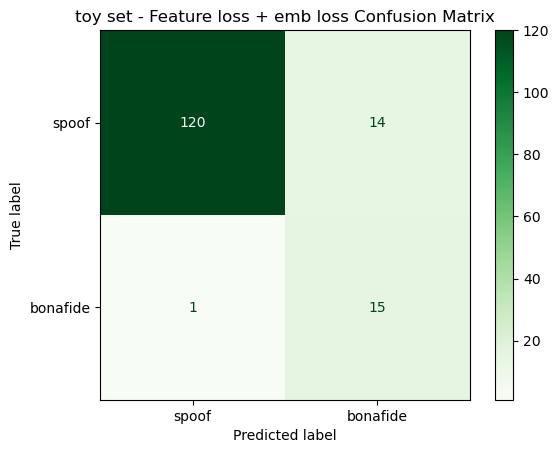

In [9]:
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("toy set - Feature loss + emb loss Confusion Matrix")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

In [12]:
# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print(eer*100.0, threshold)

6.110074626865672 2.0657944679260254


### 1e-05_toy_contraall_epoch_57.txt

In [5]:
pred_df = pd.read_csv("docs/1e-05_toy_contraall_epoch_57.txt", sep=" ", header=None)
pred_df.columns = ["utt", "score","pred"]
pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
pred_df.head

<bound method NDFrame.head of               utt     score      pred
0    LA_E_7583177  2.095171  bonafide
1    LA_E_2305822 -1.831135     spoof
2    LA_E_6280972  0.799650  bonafide
3    LA_E_7475469 -0.358052     spoof
4    LA_E_3201553 -1.406074     spoof
..            ...       ...       ...
145  LA_E_9034225 -2.503330     spoof
146  LA_E_2304975  1.075528  bonafide
147  LA_E_9690292 -2.856091     spoof
148  LA_E_1477083 -3.660738     spoof
149  LA_E_9753859 -0.539411     spoof

[150 rows x 3 columns]>

In [6]:
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')

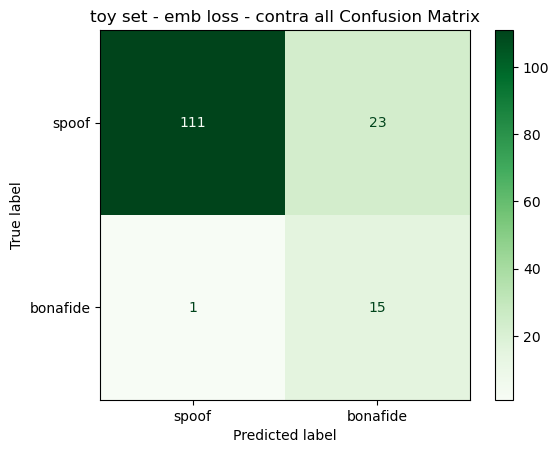

In [7]:
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Greens', values_format='g')
plt.title("toy set - emb loss - contra all Confusion Matrix")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()

In [8]:
# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['score']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['score']
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print(eer*100.0, threshold)

6.110074626865672 0.9172852039337158
